# Compte Rendu Le réchauffement climatique 

## I Mise en place du Modèle
On va tenter de répondre dans ce projet à une question : des mesures de température mesurées localement au cours du dernier siècle mettent-elles en évidence un réchauffement significatif ? On va travailler pour répondre à cette question sur les relevés de température enregistrés quotidiennement depuis juin 1920 à la station météorologique de Montélimar. Elles peuvent être téléchargées librement depuis le site de l'ECAD (European Climate Assessment & Dataset).

Vous trouverez dans le fichier montelimar_temperature.dat un fichier de données préparées avec :

colonne 1 : date en MJD (modified Julian Day)


colonne 2 : température en degrés Celsius

La première problématique à laquelle on est confronté est de faire apparaître un effet faible et lent  à l'échelle des données (amplitudes de fluctuations quotidiennes ou saisonnières dix fois supérieures typiquement).

La seconde problématique est de montrer que l'effet observé est significatif, c'est-à-dire que cette augmentation des températures ne correspond pas à une fluctuation statistique. Pour cela on supposera que l'erreur sur les mesures de température est de l'ordre de 5 °C. C'est l'ordre de grandeur des fluctuations quotidiennes qui ne seront pas prises en compte dans un modèle qui décrit des variations saisonnières.

Les variations saisonnières de la température peuvent être modélisée par une sinusoïde de période une année. Il faut utiliser un modèle du type sinusoïdal :$$ T(t) = A \sin{(\omega t + \phi)} + B $$

où les paramètres $A$ (amplitude), $\phi$ (phase) et $B$ (température moyenne) doivent être ajustés aux données, alors que $\omega = 2\pi/1\text{ an}$. Cependant, un tel modèle ajusté sur l'ensemble des données ne donnera aucune augmentation moyenne de la température. On pourra par exemple essayer d'appliquer un ajustement sinusoïdal pour chaque décennie, et voir si le paramètre $B$ (température moyenne) augmente. On peut aussi affiner ce modèle en se disant que l'accroissement lent de la température est linéaire. On pourra alors utiliser un modèle de type :

$$ T(t) = A \sin{(\omega t + \phi)} + B + C t $$

où $C$ est un nouveau paramètre à ajuster, qui correspond à l'accroissement linéaire lent de la température.
On pourra par ailleurs s'aider de la fonction curve_fit de la bibliothèque scipy.optimize.

## II-Résolution numérique

On va ici répondre à la première problématique qui est de monter un effet faible et lent de l'augmentation de la température.
Pour cela on va faire un ajustement linéaire du type $ax=b$. On coveritira aussi les Modified Julian days en jour du calendrier grégorien

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

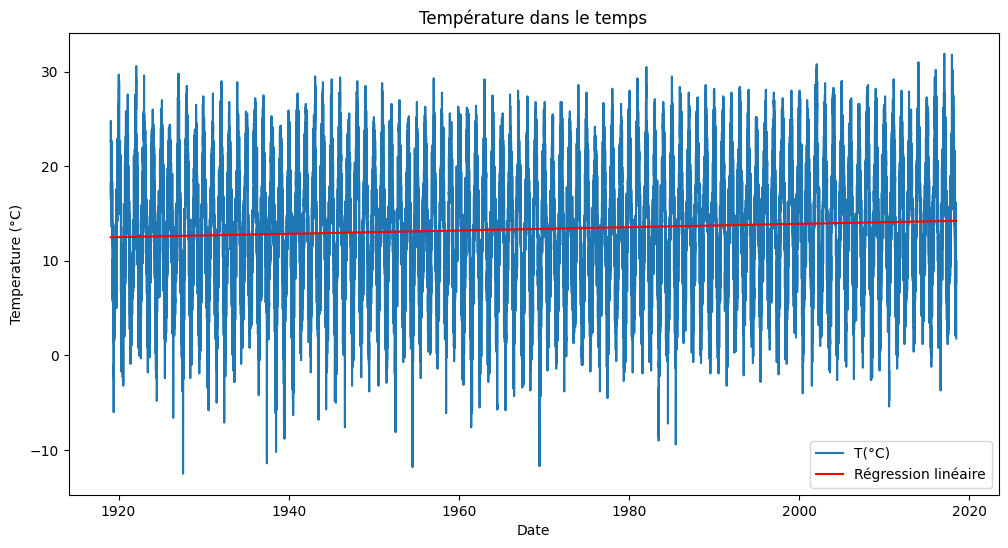

Pente du modèle: 0.017530195881176547
Erreur sur la pente  0.0013021309212939958


In [28]:

data = np.loadtxt('montelimar_temperature.dat')

date_mjd, temperature = data[:, 0], data[:, 1]
date_utc = (date_mjd + 2400000.5) / 365.25 - 4713.5

def f(x, a,b):
    return a * x+b 

params, covariance = curve_fit(f, date_utc, temperature)


pente, intercept = params

trend_line = pente * date_utc + intercept

plt.figure(figsize=(12, 6))

plt.plot(date_utc, temperature, label='T(°C)')
plt.plot(date_utc, trend_line, label=f'Régression linéaire', color='red')


plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Température dans le temps')
plt.legend()
plt.show()
print('Pente du modèle:',pente)
print('Erreur sur la pente ',np.sqrt(covariance[0,0]))

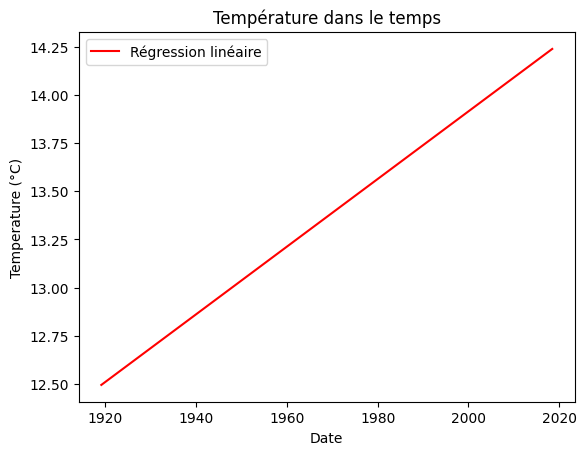

In [4]:
plt.plot(date_utc, trend_line, label=f'Régression linéaire', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Température dans le temps')
plt.legend()
plt.show()

On a donc réussi à faire un ajustement linéaire de la température en fonction du temps on voit tout d'abord que pour le graphe non ajusté les températures sont sinusoidales ce qui est attendu avec les fluctuations saisonnieres ici en faisant un curve_fit on obtient une courbe croissante linéaire de pente 0,0175. Cette dernière représente l'augmentation de la température moyenne sur 100 ans. On observe que sur 100 ans la température a en moyenne augmenté d'envrion 1,75 degrés Celsius. La pente étant faible et l'augmentation de 1,75 degrés sur 100 ans. On a donc montré un effet lent et faible dans le temps.


13.08687671235676
12.85706849359975
13.21668493190581
12.958136986302417
12.793095890173129
12.715424657590896
13.40052054825471
13.82326027397261
14.198739726694836
14.695268504475674


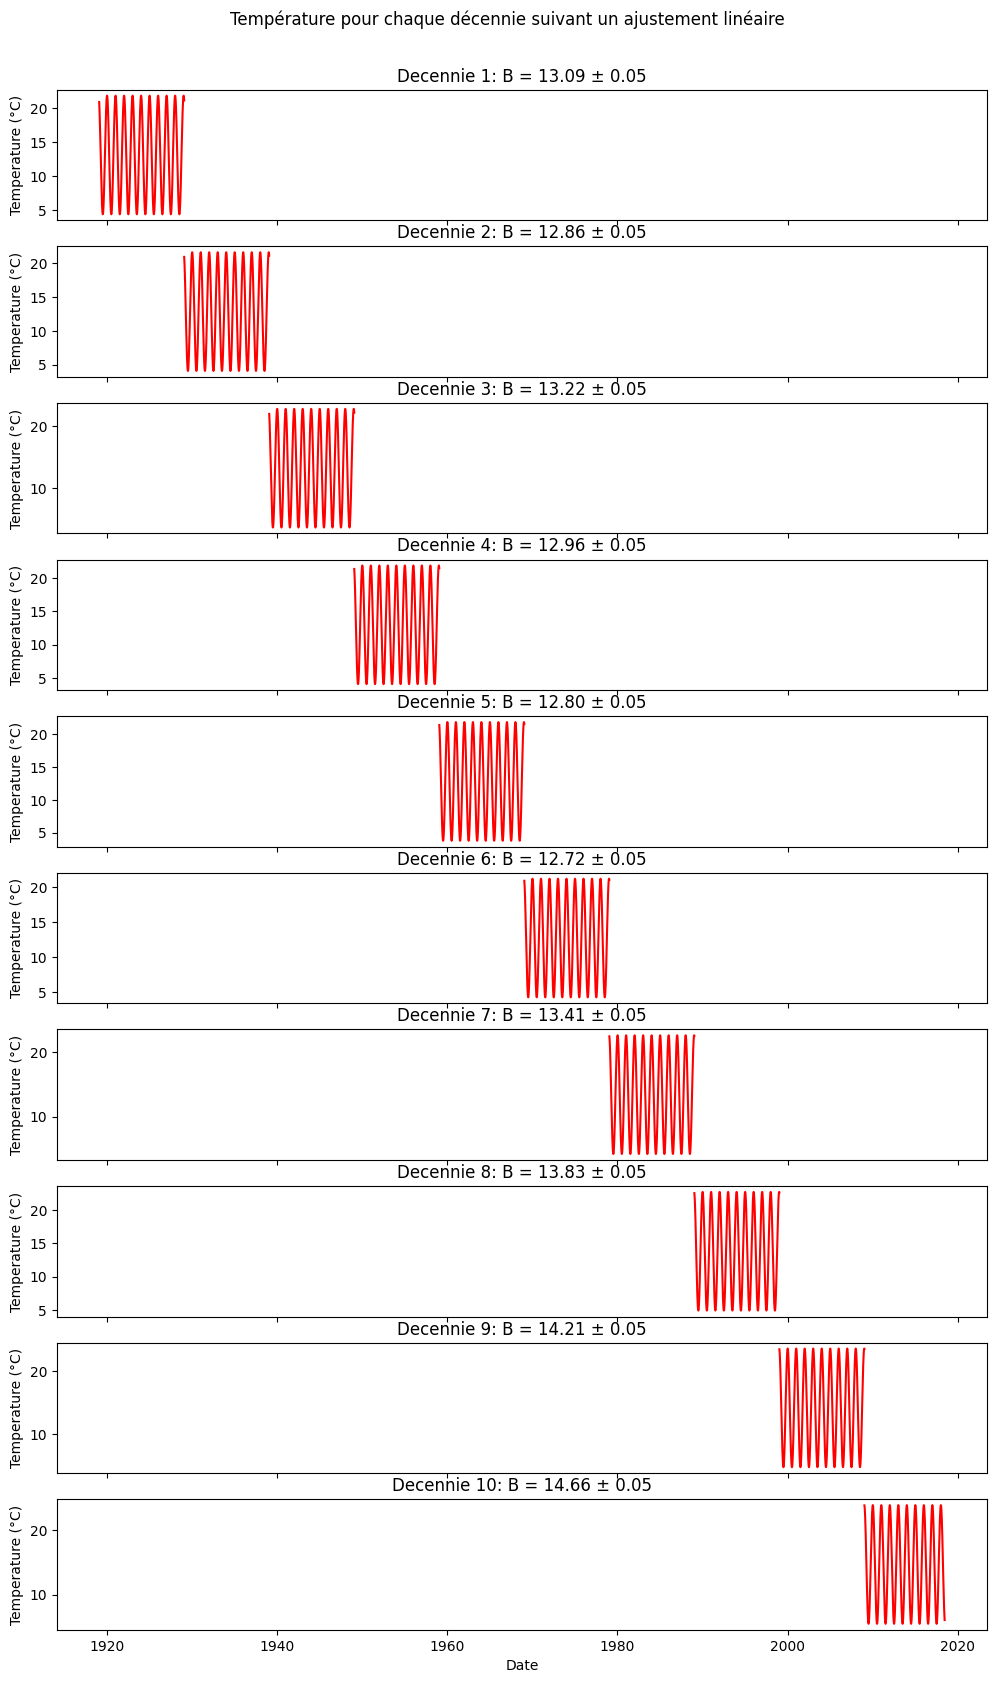

Erreur sur B: 0.0520377940242716


In [29]:
omega = 2 * np.pi / 1

def f(t, A, phi, B):
    return A * np.sin(omega * t + phi) + B

num_decades = 10


fig, axs = plt.subplots(num_decades, 1, figsize=(12, 20), sharex=True)


for decade in range(num_decades):
    start = decade * 3650
    end = (decade + 1) * 3650
    date_utc_decade = date_utc[start:end]
    temperature_decade = temperature[start:end]
    

    params, covariance = curve_fit(f, date_utc_decade, temperature_decade)
    A, phi, B = params

    error_B = np.sqrt(covariance[2, 2])
   
    fitted_curve = f(date_utc_decade, A, phi, B)
    axs[decade].plot(date_utc_decade, fitted_curve, linestyle='-', color='red', label='Fitted Model')

    axs[decade].set_ylabel('Temperature (°C)')
    axs[decade].set_title(f'Decennie {decade + 1}: B = {B:.2f} ± {error_B:.2f}')
    M=np.mean(fitted_curve)
    print(M)
    
axs[-1].set_xlabel('Date')
plt.suptitle('Température pour chaque décennie suivant un ajustement linéaire', y=0.92)
plt.show()
error_B = np.sqrt(covariance[2, 2])
print("Erreur sur B:", error_B)

On a ici fait un ajustement des valeurs de Température en fonction du temps pour chaque décennie. On a aussi affiché l'erreur sur le paramètre B. On voit que l'ajustement est bien sinusoidal comme attendu. L'erreur sur le paramètre B est de 0,05 $°C$. On voit que la valeur de B oscille autour de 13 degrés. Cependant à partir de 1960 on observe une augmentation des valeurs de B qui augmente sur 60 ans de pratiquement 2 degrés. Cette augmentation est très significative pour cette période. Le fait que la température moyenne sur 10 ans augmente aussi drastiquement n'est pas négligeable et témoigne bien le fait qu'il y a un réchauffement climatique.L'erreur sur B semble bien cohérentre mais même en la prenant en compte les valeurs ne sont pas aberrantes.


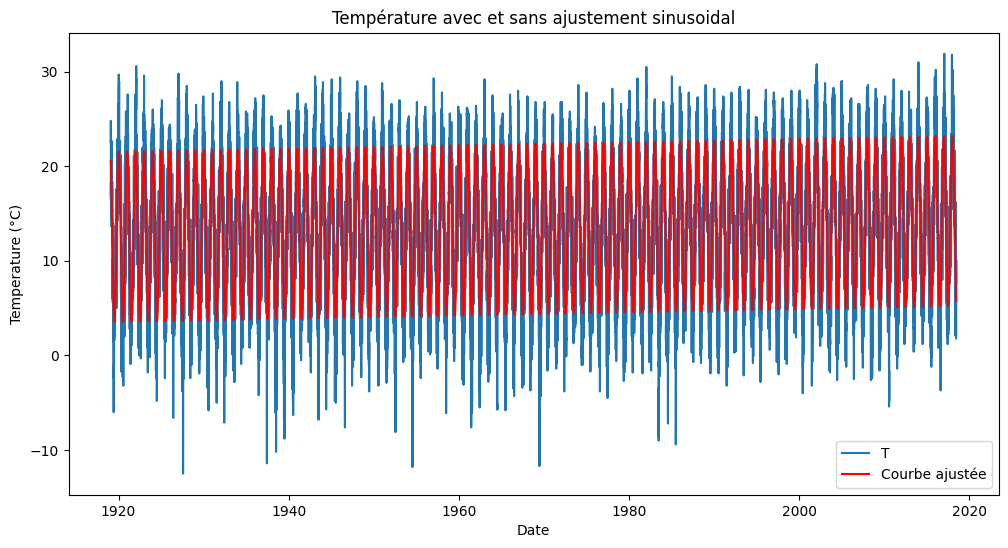

Erreur des paramètres:
A erreur: 0.023612092440260322
Phi erreur: 0.0026178683748476726
B erreur: 1.145321500480352
C erreur: 0.0005816813128815284
Valeur de C : 0.016863760873462308
Valeur moyenne : 13.3670478035668


In [21]:

def f(t, A, phi, B, C):
    return A * np.sin(omega * t + phi) + B + C * t



params, covariance = curve_fit(f, date_utc, temperature)

A, phi, B, C = params

A, phi, B, C = params
errors = np.sqrt(np.diag(covariance))

plt.figure(figsize=(12, 6))
plt.plot(date_utc, temperature, label='T')
fitted_curve = f(date_utc, A, phi, B, C)
plt.plot(date_utc, fitted_curve, linestyle='-', color='red', label='Courbe ajustée')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Température avec et sans ajustement sinusoidal')
plt.legend()
plt.show()

print("Erreur des paramètres:")
print("A erreur:", errors[0])
print("Phi erreur:", errors[1])
print("B erreur:", errors[2])
print("C erreur:", errors[3])
print("Valeur de C :",C)
M=np.mean(fitted_curve)
print('Valeur moyenne :',M)


Ici on a fait un autre modèle sinusoidal et linéaire: On a introduit le paramètre $C$. On voit que la sinusoide ajustée possède une petite pente qui est en fait $C$. D'où l'augmentation lente sur le graphe. De plus l'ajustement rend des valeurs plus serrées de température. Le terme C étant positif on a bien une de la température. La température varie de manière sinusoidale pour des températures moins chaudes et moins froides autour d'une valeur moyenne de 13.36 degrés environ. On remarque que $C$ est proche du facteur $a$ de la courbe linéaire en prenant en compte les erreurs sur $C$ et $a$, les valeurs sont dans le même intervalle on a donc bien un effet d'augmentation faible et lent comme attendu dans l'énoncé pour le paramètre $C$.


## IV-Conclusion


On a donc ici répondu à nos deux problématiques tout d'dabord on a montré par un modèle linéaire que la température augmentait de manière faible et lente sur 100 ans. L'augmentation est de 1,75 degrés Celsius avec une erreur de 0,1 degrés ce qui est acceptable.

Ensuite en utilisant un modèle sinusoidal on peut que le paramètre B représentant l'évolution moyenne de la moyenne augmente pour chaque décennie à partir de 1960. Cette augmentation de 2 degrés est considérable pour 60 ans en effet on passe en 1960 d'une température de 12,80 degrés à 14,66 en 2020 en prenant compte l'erreur de $±$ 0,05 degrés.
Puis on peut reprendre le modèle sinusoidal en ajustement un paramètre qui est l'accroissment linéaire lent de la température. Cette grandeur est de 0,016 ce qui donne une pente faible semblable à celle de la première problématique. Or ce dernier ajustement est en fait une combinaison des deux précédents. On a alors la température moyenne qui augmente rapidement de 0,4 degrés en 0,4 à partir de 1960 et il y a une pente d'accroisement lent de la température dans le temps.

Ces deux combinés donnent bien un effet significatif du réchauffement climatique, avec la température moyenne qui augmente avec un accroissement lent de la température. Si l'on suit ce modèle on finira par arriver à des temps où les augmentations seront considérables.

Il serait donc intéressant de voir les limites avec les nouvelles valeurs de températures sur les 4 dernières années étant données que certaines mesures on commencé à être prise. On pourrait alors voir si le modèle continue d'augmenter plus lentement,se stabilise où même diminue.